### Movie distances

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

read .csv file

In [24]:
df = pd.read_csv('distances.csv', header=0, names=['Actor_first', 'Link_first',
                                                       'Actor_second', 'Link_second', 'Distance'])
df

,Actor_first,Link_first,Actor_second,Link_second,Distance
0,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,2
1,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Akshay Kumar,https://www.imdb.com/name/nm0474774/,2
2,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Jackie Chan,https://www.imdb.com/name/nm0000329/,2
3,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Bradley Cooper,https://www.imdb.com/name/nm0177896/,2
4,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Adam Sandler,https://www.imdb.com/name/nm0001191/,2
...,...,...,...,...,...
84,Chris Evans,https://www.imdb.com/name/nm0262635/,Jackie Chan,https://www.imdb.com/name/nm0000329/,2
85,Chris Evans,https://www.imdb.com/name/nm0262635/,Bradley Cooper,https://www.imdb.com/name/nm0177896/,2
86,Chris Evans,https://www.imdb.com/name/nm0262635/,Adam Sandler,https://www.imdb.com/name/nm0001191/,2
87,Chris Evans,https://www.imdb.com/name/nm0262635/,Scarlett Johansson,https://www.imdb.com/name/nm0424060/,1


### Network graph

create a network

In [3]:
G = nx.Graph()
edge_colors = []
edge_labels = {}

In [4]:
for ind in df.index:
    G.add_edge(df['Actor_first'][ind], df['Actor_second'][ind])
    G[df['Actor_first'][ind]][df['Actor_second'][ind]]['weight'] = df['Distance'][ind]

In [5]:
for e in G.edges(data=True):
    if (int(e[2]['weight'])) == 1:
        edge_colors.append('r')
    else:
        edge_colors.append('g')
    edge_labels.setdefault((e[0], e[1]), int(e[2]['weight']))

plot the graph of a network with all distances between actors

{('Dwayne Johnson',
  'Robert Downey Jr.'): Text(0.9045085018604486, 0.29389263494502404, '2'),
 ('Dwayne Johnson',
  'Akshay Kumar'): Text(0.6545084884494037, 0.4755282818745524, '2'),
 ('Dwayne Johnson',
  'Jackie Chan'): Text(0.3454914877087385, 0.4755282520722302, '2'),
 ('Dwayne Johnson',
  'Bradley Cooper'): Text(0.09549150410001578, 0.29389263494502404, '2'),
 ('Dwayne Johnson',
  'Adam Sandler'): Text(5.960464510845753e-09, -2.9008645978946276e-08, '2'),
 ('Dwayne Johnson',
  'Scarlett Johansson'): Text(0.095491533902338, -0.29389263534186216, '2'),
 ('Dwayne Johnson',
  'Sofia Vergara'): Text(0.34549144300525525, -0.47552822266674616, '2'),
 ('Dwayne Johnson',
  'Chris Evans'): Text(0.6545085629552092, -0.47552822266674616, '2'),
 ('Dwayne Johnson',
  'Chris Hemsworth'): Text(0.9045084720581265, -0.29389263534186216, '2'),
 ('Robert Downey Jr.',
  'Chris Hemsworth'): Text(0.8090169739185751, -1.5099580141786362e-08, '1'),
 ('Robert Downey Jr.',
  'Akshay Kumar'): Text(0.559016

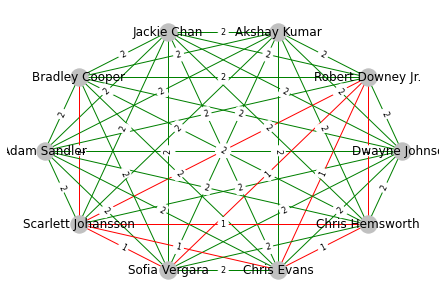

In [6]:
nx.draw_circular(G, node_color='silver', width=1, with_labels=True, edge_color=edge_colors)
pos = nx.circular_layout(G)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='black',
    font_size=8,
    )

**plot where only edges for movie distance equal to 1 will be visualised**

In [7]:
df_level1 = df[df['Distance'] == 1]
df_level1

,Actor_first,Link_first,Actor_second,Link_second,Distance
9,Chris Hemsworth,https://www.imdb.com/name/nm1165110/,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,1
14,Chris Hemsworth,https://www.imdb.com/name/nm1165110/,Scarlett Johansson,https://www.imdb.com/name/nm0424060/,1
16,Chris Hemsworth,https://www.imdb.com/name/nm1165110/,Chris Evans,https://www.imdb.com/name/nm0262635/,1
18,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,Chris Hemsworth,https://www.imdb.com/name/nm1165110/,1
23,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,Scarlett Johansson,https://www.imdb.com/name/nm0424060/,1
24,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,Sofia Vergara,https://www.imdb.com/name/nm0005527/,1
25,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,Chris Evans,https://www.imdb.com/name/nm0262635/,1
50,Bradley Cooper,https://www.imdb.com/name/nm0177896/,Scarlett Johansson,https://www.imdb.com/name/nm0424060/,1
63,Scarlett Johansson,https://www.imdb.com/name/nm0424060/,Chris Hemsworth,https://www.imdb.com/name/nm1165110/,1
64,Scarlett Johansson,https://www.imdb.com/name/nm0424060/,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,1


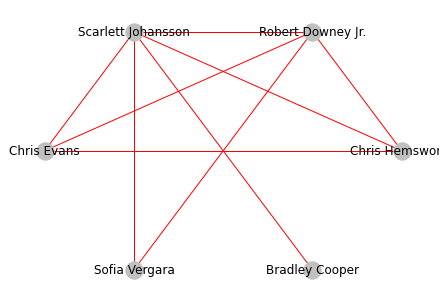

In [8]:
G1 = nx.Graph()
for ind in df_level1.index:
    G1.add_edge(df_level1['Actor_first'][ind], df_level1['Actor_second'][ind], 
                color='r', label = df_level1['Distance'][ind])
nx.draw_circular(G1, node_color='silver', width=1, with_labels=True, edge_color='r')

**plot where only edges for movie distance equal to 2 will be visualised**

In [9]:
df_level2 = df[df['Distance'] == 2]
df_level2

,Actor_first,Link_first,Actor_second,Link_second,Distance
0,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,2
1,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Akshay Kumar,https://www.imdb.com/name/nm0474774/,2
2,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Jackie Chan,https://www.imdb.com/name/nm0000329/,2
3,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Bradley Cooper,https://www.imdb.com/name/nm0177896/,2
4,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Adam Sandler,https://www.imdb.com/name/nm0001191/,2
...,...,...,...,...,...
83,Chris Evans,https://www.imdb.com/name/nm0262635/,Akshay Kumar,https://www.imdb.com/name/nm0474774/,2
84,Chris Evans,https://www.imdb.com/name/nm0262635/,Jackie Chan,https://www.imdb.com/name/nm0000329/,2
85,Chris Evans,https://www.imdb.com/name/nm0262635/,Bradley Cooper,https://www.imdb.com/name/nm0177896/,2
86,Chris Evans,https://www.imdb.com/name/nm0262635/,Adam Sandler,https://www.imdb.com/name/nm0001191/,2


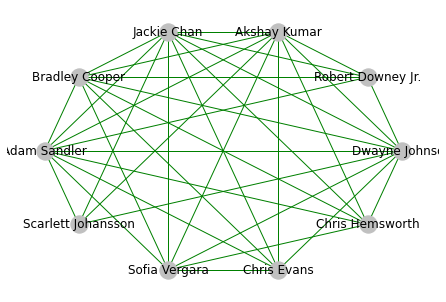

In [10]:
G2 = nx.Graph()
for ind in df_level2.index:
    G2.add_edge(df_level2['Actor_first'][ind], df_level2['Actor_second'][ind], 
                color='g', label = df_level2['Distance'][ind])
nx.draw_circular(G2, node_color='silver', width=1, with_labels=True, edge_color='g')

### Wordclouds

In [11]:
from wordcloud import WordCloud
from os import path
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\poder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\poder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def get_wordcloud(actor_name):
    data=pd.read_csv(actor_name+'.txt', sep='/n', header=None, engine='python')
    text = ''
    for ind in data.index:
        text += data[0][ind] + ' '
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    tokens_without_sw = ' '.join(tokens_without_sw)
    wordcloud = WordCloud(max_font_size=50).generate(tokens_without_sw)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [13]:
actors = df['Actor_first'].unique()
actor_ind = 0

Dwayne Johnson


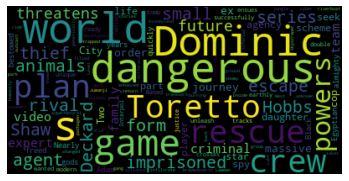

In [14]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Chris Hemsworth


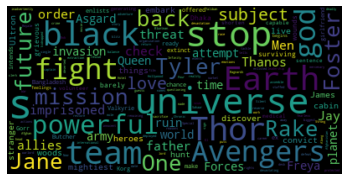

In [15]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Robert Downey Jr.


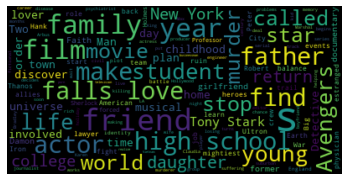

In [16]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Akshay Kumar


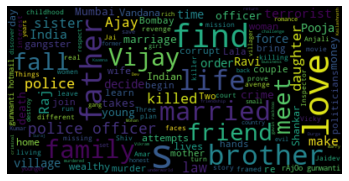

In [17]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Jackie Chan


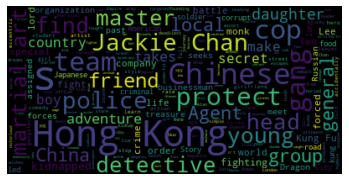

In [18]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Bradley Cooper


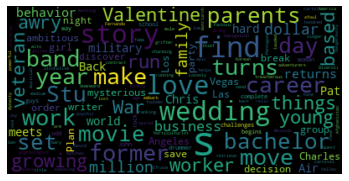

In [19]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Adam Sandler


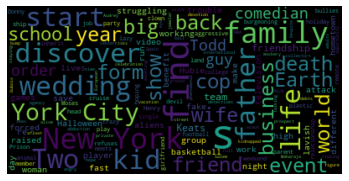

In [20]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Scarlett Johansson


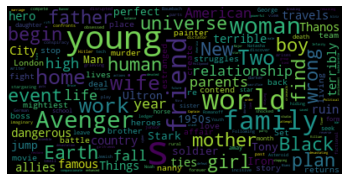

In [21]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Sofia Vergara


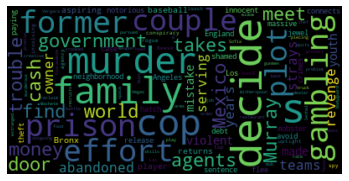

In [22]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1

Chris Evans


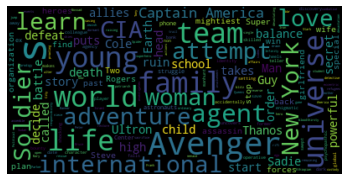

In [23]:
print(actors[actor_ind])
get_wordcloud(actors[actor_ind])
actor_ind += 1